<a href="https://colab.research.google.com/github/liam-haas/CLPS0950_FinalProject/blob/main/Project_Testbed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 

In [ ]:
%pip install rdkit-pypi

from rdkit import Chem
from rdkit.Chem import *
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import RDKFingerprint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 18.4 MB/s eta 0:00:00


In [4]:
import numpy as np

A = 'C=CC'
B = 'C=CC=C'

def index_fun(x):
  indices = [index for index in range(len(x)) if x.startswith('=',index)]
  # print(indices) # prints all occurances of double bonds in the SMILES string
  
  for n in range(0,len(indices)):

    a = indices[n] #testing to see if a phenyl is present
    #  try:
    #      x[a+6] != '1'
    #  except IndexError:
    #      continue
    #  return 
    
    if x[a-1] == 'C' and x[a+1] == 'C': # and x[a+6] != '1'
      

      print('Alkene found at position ', a)
    else:
      continue

  return indices

index_fun(A)

Alkene found at position  1


[1]

[Gardio set-up](https://https://gradio.app/quickstart/)

In [ ]:
import pandas as pd
# pd.read_csv('Test SMILES sequences - Sheet1.csv')
d = {'IUPAC name':['ethene','prop-1-ene','3-methylpent-1-ene','1-phenylprop-2-ene','but-1,3-diene'],
     'SMILES sequence':['C=C','C=CC','C=CC(CC)C','C=CCC1=CC=CC=C1','C=CC=C']}
d['Alkenes'] = [index_fun(item) for item in d['SMILES sequence']] 
df = pd.DataFrame(data=d)
df

In [ ]:
import gradio as gr

def SMILEStoMol(x):
  return Chem.MolFromSmiles(x)

demo = gr.Interface(SMILEStoMol, inputs=gr.Textbox(lines=1, placeholder="Enter SMILES Sequence Here"), outputs="image")

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

**New strategy below:** converting SMILES string to list and searching for alkenes.

In [2]:
%pip install rdkit-pypi
from rdkit import Chem
from rdkit.Chem import *
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import RDKFingerprint
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 18.7 MB/s eta 0:00:00


In [78]:
A = 'C=CC'
B = 'C=CC=C'
C = 'C=CC(CC)C'
D = 'C=CCC1=CC=CC=C1'

def react(string):
  str_as_list = []
  str_as_list[:0] = string
  if '=' in str_as_list:
    i = A.index('=')

    del str_as_list[i:i+2]

    str_as_list.insert(i, 'C')
    str_as_list.insert(i+1, '(Br)')
    newMol = ''.join(str_as_list)
    pdt = Chem.MolFromSmiles(newMol)
    return pdt



def alkene_type(string):
  str_as_list = []
  str_as_list[:0] = string
  if '=' in str_as_list:
    i = A.index('=')

  try:
    # A[i-2], A[i-3], A[i-4], A[i+2], A[i+3], A[i+4]
    if (A[i-2] == 'C' and A[i-3] == 'C' and A[i-4] == 'C') or (A[i+2] == 'C' and A[i+3] == 'C' and A[i+4] == 'C'):
     alkene_type = 'tertiary'
  except IndexError:
    try: 
      # A[i-2], A[i-3], A[i+2], A[i+2]
      if (A[i-2] == 'C' and A[i-3] == 'C') or (A[i+2] == 'C' and A[i+2] == 'C'):
        alkene_type = 'secondary'
    except IndexError:
      try: 
        # A[i-2], A[i+2]
        if A[i-2] == [] or A[i+2] == []:
          alkene_type = 'primary'
      except IndexError:
        print('This is not a valid alkene')
        return alkene_type

alkene_type(C)
print(alkene_type(C))

None


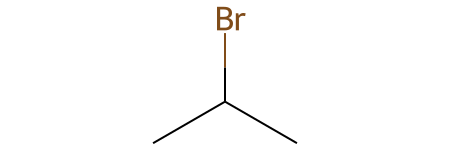

In [36]:
from __future__ import print_function
from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors

from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG=False

from itertools import chain

propene = Chem.MolFromSmiles('C=CC')
ethene = Chem.MolFromSmiles('C=C')
butene = Chem.MolFromSmiles('CC=CC')
mol1 = Chem.MolFromSmiles('C=CCC1=CC=CC=C1')


def rxn1(x):
  a = Chem.MolFromSmiles(x)
  rxn1 = AllChem.ReactionFromSmarts('[CH:1]=[C:2]>>[CH:1]([Br])[C:2]')
  pdt = rxn1.RunReactants((a, ))[0][0]
  return pdt

rxn1('C=CC')

# import pandas as pd
# m = {'Alkenes':['C=C','C=CC','C=CCC','C/C=C/C','C=CCCC','C/C=C\C','C/C=C/CC','C/C=C\CC','C=CC(CC)C','C/C=C/C(C)C','C=C(C)C','C=CC(CC)CC','CCC(CC)/C=CC/C(C)C','C/C=C(CC)/CC','CCCC(CC)(C)/C=C/C']}
# m['Rxn with HBr'] = [rxn1(item) for item in m['Alkenes']]
# df = pd.DataFrame(data=m)
# df






# def rxn2(x):
#   rxn2 = AllChem.ReactionFromSmarts('[C:1]=[C:2][C1:3]>>[C:1][C:2]([Br])[C1:3]')
#   pdt = rxn2.RunReactants((mol1, ))[0][0]
#   return pdt

In [54]:
from itertools import combinations
import pandas as pd

features = ['C', '=', 'C', 'C']
tmp = []
for i in range(len(features)):
    oc = combinations(features, i + 1)
    for c in oc:
        tmp.append(list(c))
print(tmp)

d = {'TMPs':tmp}
d['Sequence'] = [''.join(a) for a in d['TMPs']]

def seq_to_struc(y):
  try: 
    [Chem.MolFromSmiles(b) for b in d['Sequence']]
  except TypeError: # we need to figure out how to predict this error
    print('N/A')
    return

d['Structure'] = [seq_to_struc(b) for b in d['Sequence']] # not working properly at the moment
df = pd.DataFrame(data=d)
df

[['C'], ['='], ['C'], ['C'], ['C', '='], ['C', 'C'], ['C', 'C'], ['=', 'C'], ['=', 'C'], ['C', 'C'], ['C', '=', 'C'], ['C', '=', 'C'], ['C', 'C', 'C'], ['=', 'C', 'C'], ['C', '=', 'C', 'C']]


[14:58:43] SMILES Parse Error: syntax error while parsing: =
[14:58:43] SMILES Parse Error: Failed parsing SMILES '=' for input: '='
[14:58:43] SMILES Parse Error: syntax error while parsing: C=
[14:58:43] SMILES Parse Error: Failed parsing SMILES 'C=' for input: 'C='
[14:58:43] SMILES Parse Error: syntax error while parsing: =C
[14:58:43] SMILES Parse Error: Failed parsing SMILES '=C' for input: '=C'
[14:58:43] SMILES Parse Error: syntax error while parsing: =C
[14:58:43] SMILES Parse Error: Failed parsing SMILES '=C' for input: '=C'
[14:58:43] SMILES Parse Error: syntax error while parsing: =CC
[14:58:43] SMILES Parse Error: Failed parsing SMILES '=CC' for input: '=CC'
[14:58:43] SMILES Parse Error: syntax error while parsing: =
[14:58:43] SMILES Parse Error: Failed parsing SMILES '=' for input: '='
[14:58:43] SMILES Parse Error: syntax error while parsing: C=
[14:58:43] SMILES Parse Error: Failed parsing SMILES 'C=' for input: 'C='
[14:58:43] SMILES Parse Error: syntax error while p

,TMPs,Sequence,Structure
0,[C],C,None
1,[=],=,None
2,[C],C,None
3,[C],C,None
4,"[C, =]",C=,None
5,"[C, C]",CC,None
6,"[C, C]",CC,None
7,"[=, C]",=C,None
8,"[=, C]",=C,None
9,"[C, C]",CC,None
